In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy import integrate
from numba import njit
import scipy.stats as stats


In [3]:
tau=30.05/np.log(2)
gamma=1/tau
print(f"gamma = {gamma}")

gamma = 0.023066461915472385


In [4]:
t=np.arange(0,7*tau+1,1)
tmed=((t+np.roll(t, shift=1))/2)[1:]

def P(t):
    return gamma*np.exp(-gamma*t)

pdf=np.array([integrate.quad(P,i,i+1)[0] for i in t[:-1]]) #integramos en el dt para obtener la pdf en el tiempo

cdf=np.cumsum(pdf) 
cdf=np.insert(cdf, 0, 0)#encontramos la cdf

In [5]:
def simul3(N):
    numero_nucleos=N
    numero_decaimientosB=[]
    tiempos=[]
    ti=0
    while numero_nucleos > 0:
        dec=stats.poisson.rvs(pdf[0]*numero_nucleos,size=1)[0]
        tiempos.append(ti)
        numero_decaimientosB.append(dec)
        ti+=1
        numero_nucleos-=dec
    return np.array([tiempos,numero_decaimientosB])

N=np.array([5.2e8])
s3=[]
for n in N:
    s3.append(simul3(int(n)))   #simulamos para las diferentes cantidades de núcleos

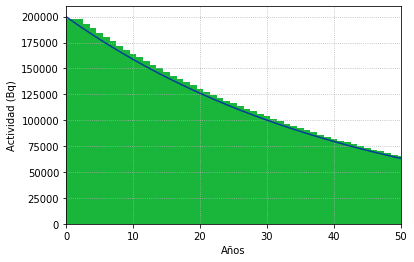

In [6]:
fig , ax = plt.subplots()  #Graficacion

ax.bar(s3[0][0],s3[0][1]/(1*60),color="#1AB63C",label=("Simulación binomial"),width=5) 
ax.plot(t,N[0]*P(t)/60,color="#003E99")
#ax.set_title(f"Simulación para {N[0]:.1E} núcleos")
ax.set_ylabel("Actividad (Bq)")
ax.set_xlabel("Años")
##ax.set_yscale("log")
ax.grid(linestyle=':')
ax.set_xlim(0,50)
plt.savefig('poisson.jpg', bbox_inches='tight')

In [8]:
s3[0][1]/(60*1)
for i in range(10,31):
    print(f"{i+1}años---->{np.round(s3[0][1][i]/(60*1),2)}")

11años---->156997.28
12años---->153368.35
13años---->149961.05
14años---->146415.05
15años---->143042.2
16años---->139838.95
17años---->136701.85
18años---->133523.97
19años---->130443.13
20años---->127398.03
21años---->124583.47
22años---->121782.62
23años---->118993.78
24años---->116173.93
25años---->113617.47
26años---->111081.28
27años---->108431.53
28años---->106022.63
29años---->103608.05
30años---->101333.83
31años---->98898.17


In [9]:
for i in [0,49]:
    print(f"{i+1}años---->{np.round(s3[0][1][i]/(60*1),2)}")

1años---->197600.08
50años---->63871.85
